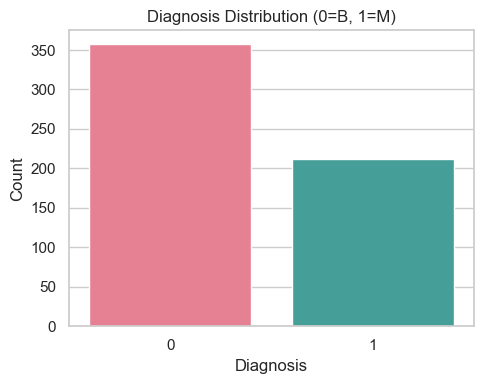

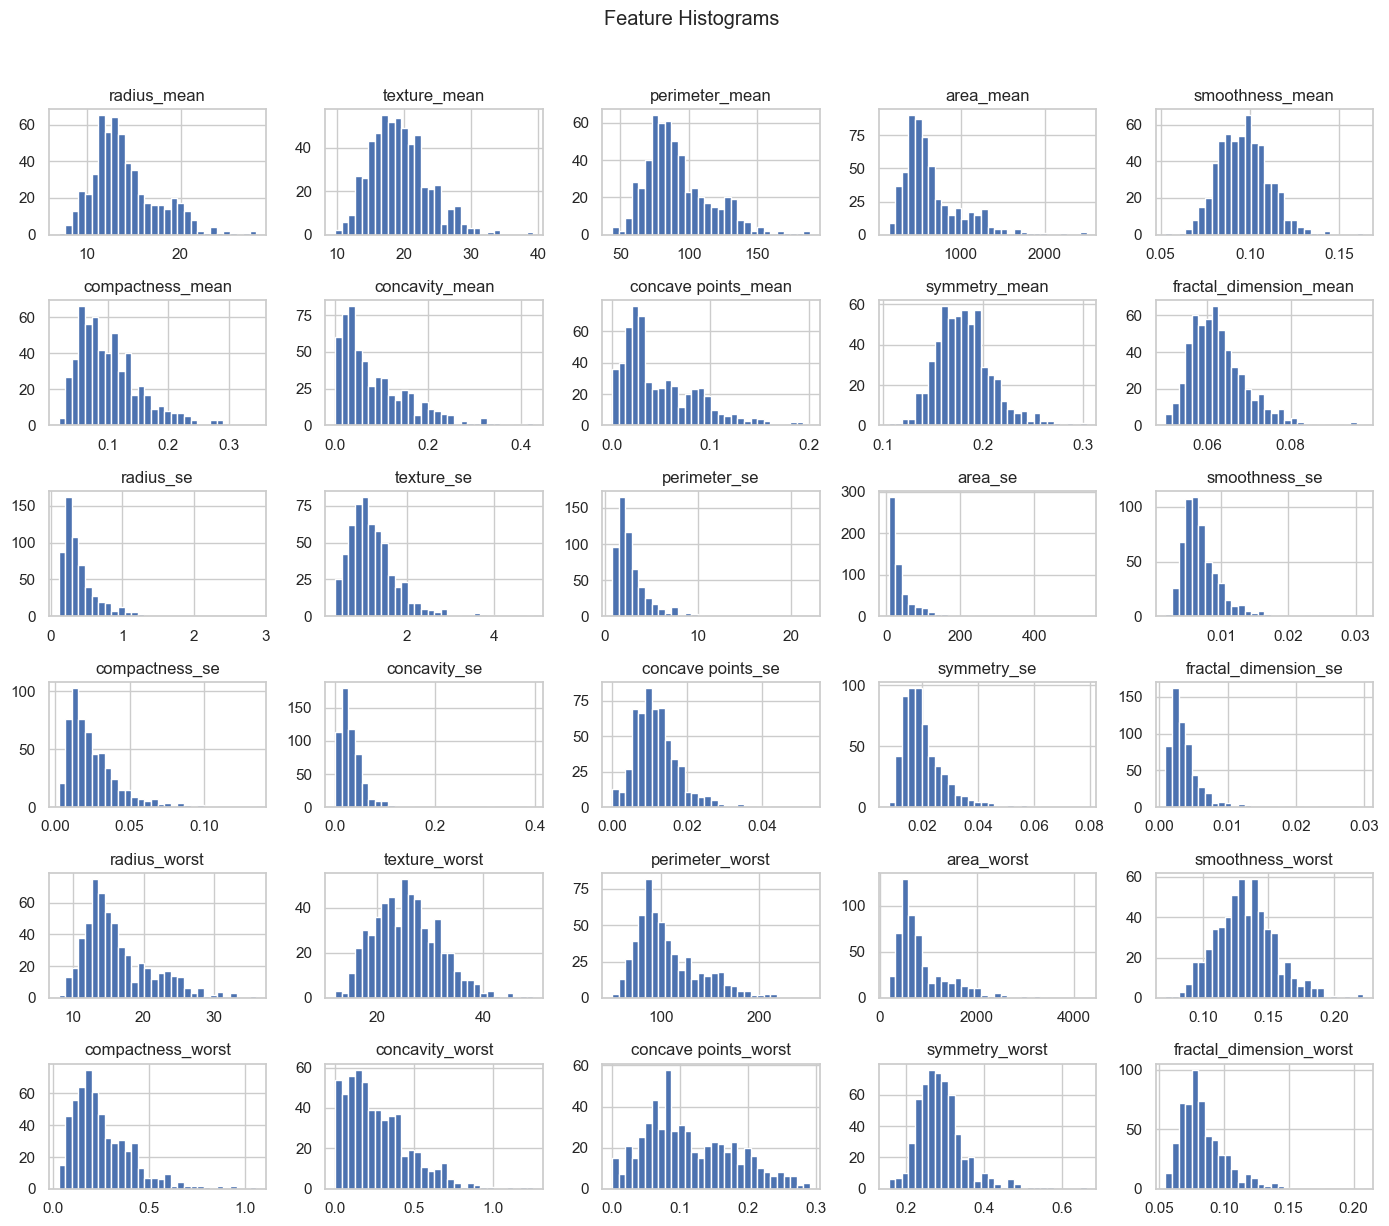

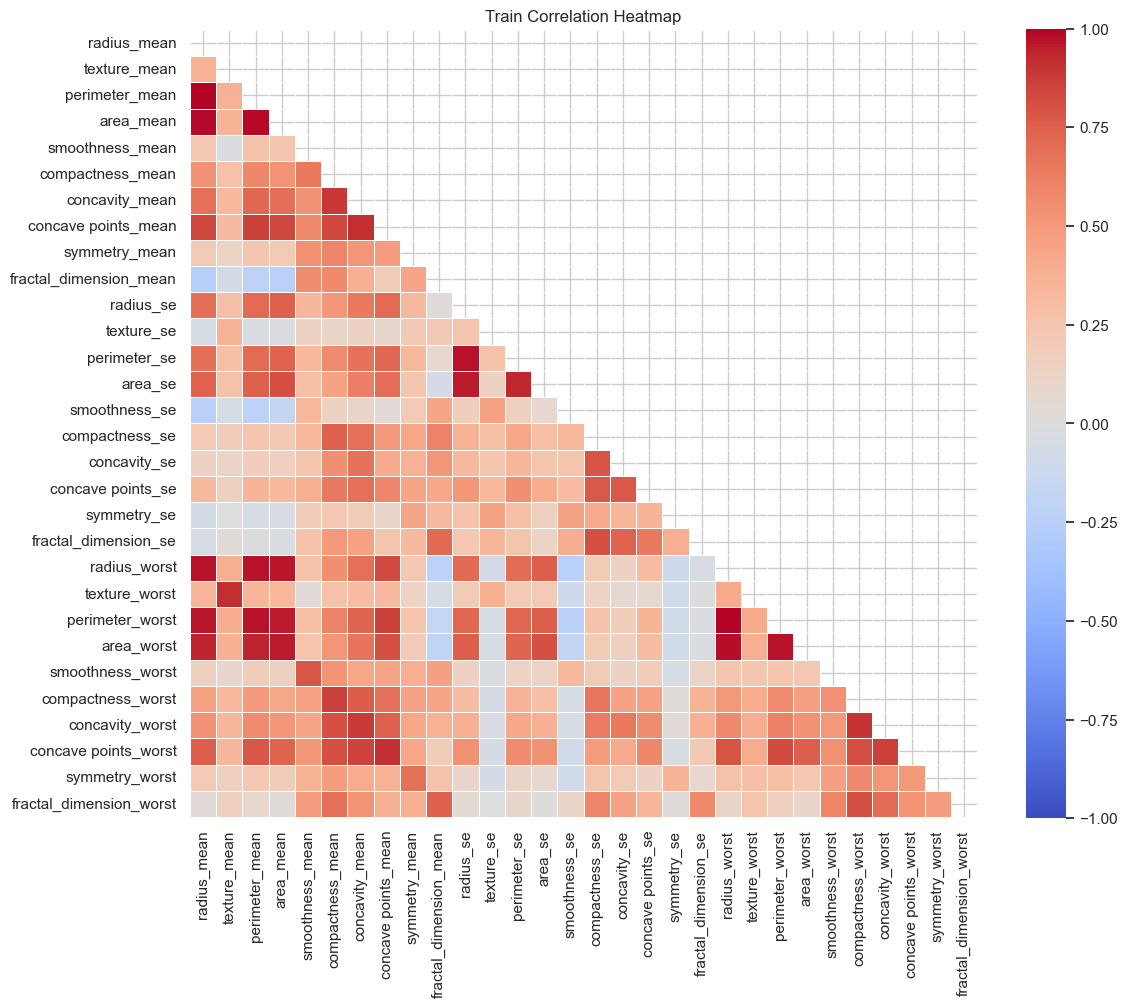

PCA retains 10 components (0.9523 variance)


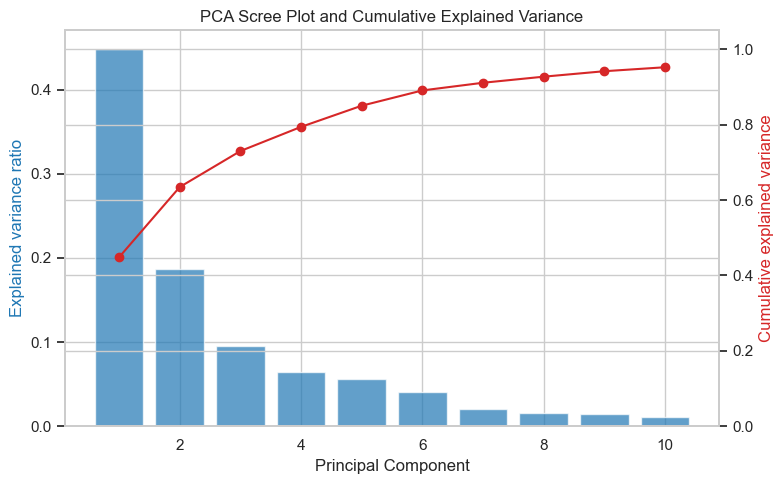

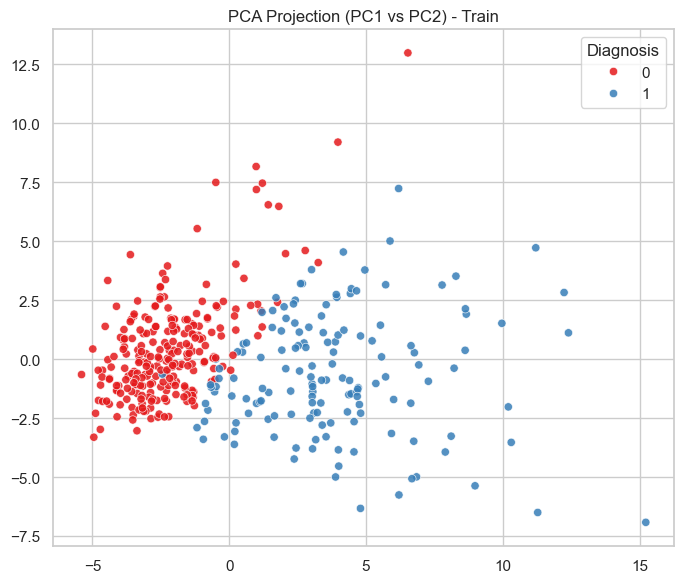


Cross-validation (train set) and Test performance:

=== LogReg ===
CV Accuracy: 0.9874 (+/- 0.0231)
Test Accuracy: 0.9474
Classification Report:
              precision    recall  f1-score   support

           0     0.9537    0.9626    0.9581       107
           1     0.9365    0.9219    0.9291        64

    accuracy                         0.9474       171
   macro avg     0.9451    0.9422    0.9436       171
weighted avg     0.9473    0.9474    0.9473       171

Confusion Matrix:
[[103   4]
 [  5  59]]


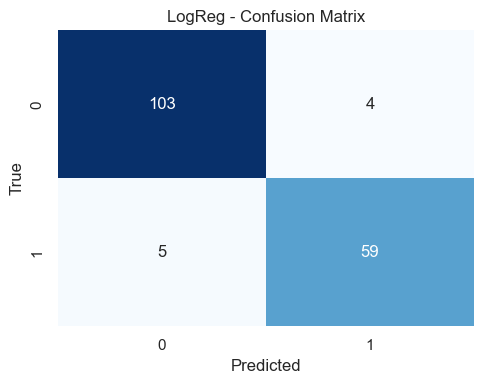


=== DecisionTree ===
CV Accuracy: 0.9321 (+/- 0.0373)
Test Accuracy: 0.9064
Classification Report:
              precision    recall  f1-score   support

           0     0.9333    0.9159    0.9245       107
           1     0.8636    0.8906    0.8769        64

    accuracy                         0.9064       171
   macro avg     0.8985    0.9033    0.9007       171
weighted avg     0.9072    0.9064    0.9067       171

Confusion Matrix:
[[98  9]
 [ 7 57]]


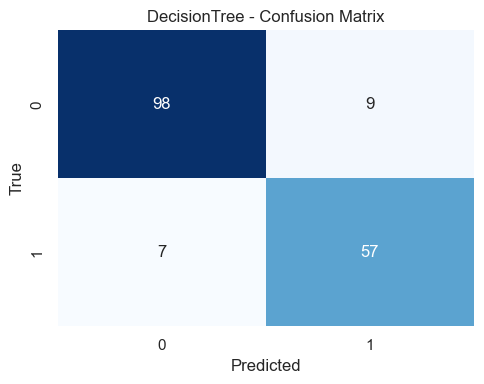


=== RandomForest ===
CV Accuracy: 0.9495 (+/- 0.0362)
Test Accuracy: 0.9474
Classification Report:
              precision    recall  f1-score   support

           0     0.9375    0.9813    0.9589       107
           1     0.9661    0.8906    0.9268        64

    accuracy                         0.9474       171
   macro avg     0.9518    0.9360    0.9429       171
weighted avg     0.9482    0.9474    0.9469       171

Confusion Matrix:
[[105   2]
 [  7  57]]


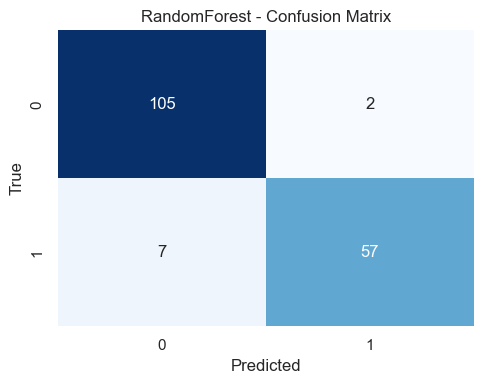


=== KNN ===
CV Accuracy: 0.9647 (+/- 0.0232)
Test Accuracy: 0.9474
Classification Report:
              precision    recall  f1-score   support

           0     0.9375    0.9813    0.9589       107
           1     0.9661    0.8906    0.9268        64

    accuracy                         0.9474       171
   macro avg     0.9518    0.9360    0.9429       171
weighted avg     0.9482    0.9474    0.9469       171

Confusion Matrix:
[[105   2]
 [  7  57]]


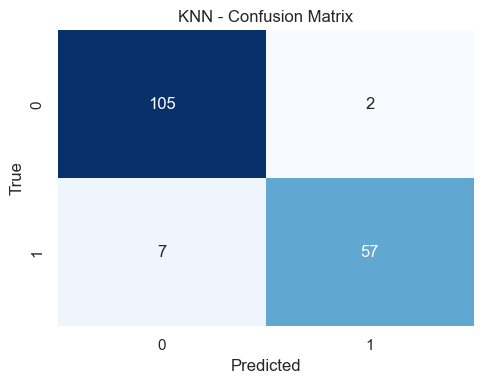


=== SVM ===
CV Accuracy: 0.9747 (+/- 0.0227)
Test Accuracy: 0.9649
Classification Report:
              precision    recall  f1-score   support

           0     0.9720    0.9720    0.9720       107
           1     0.9531    0.9531    0.9531        64

    accuracy                         0.9649       171
   macro avg     0.9625    0.9625    0.9625       171
weighted avg     0.9649    0.9649    0.9649       171

Confusion Matrix:
[[104   3]
 [  3  61]]


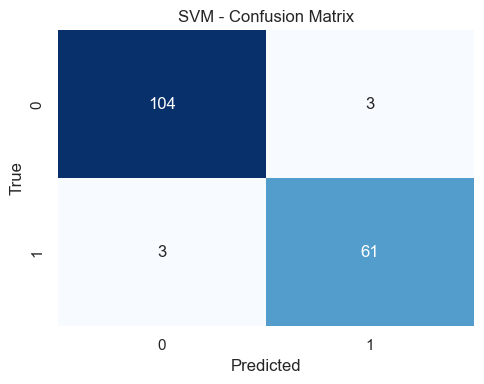


=== NaiveBayes ===
CV Accuracy: 0.9193 (+/- 0.0379)
Test Accuracy: 0.9357
Classification Report:
              precision    recall  f1-score   support

           0     0.9138    0.9907    0.9507       107
           1     0.9818    0.8438    0.9076        64

    accuracy                         0.9357       171
   macro avg     0.9478    0.9172    0.9291       171
weighted avg     0.9393    0.9357    0.9345       171

Confusion Matrix:
[[106   1]
 [ 10  54]]


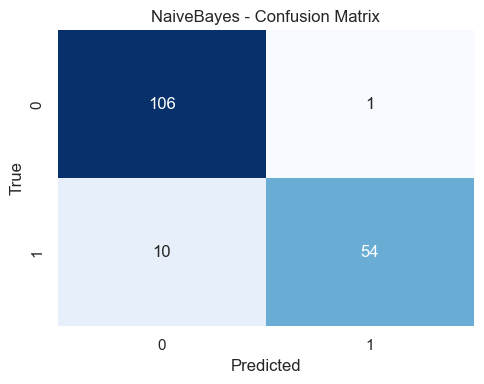

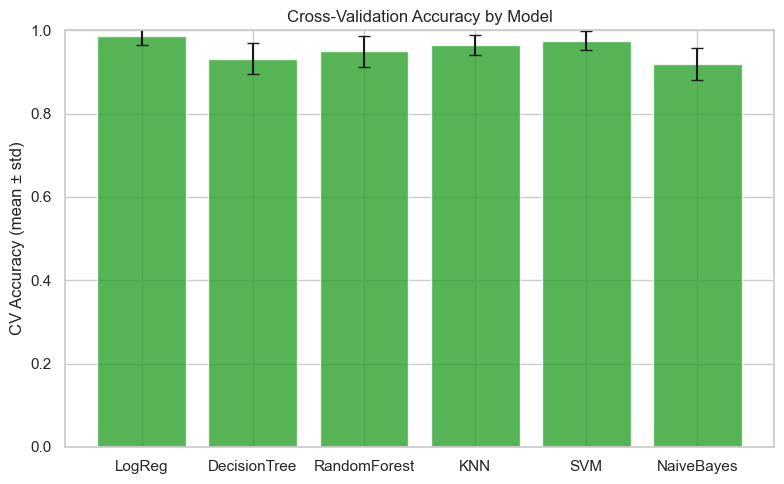


Summary (CV mean ± std):
LogReg: 0.9874 ± 0.0231
DecisionTree: 0.9321 ± 0.0373
RandomForest: 0.9495 ± 0.0362
KNN: 0.9647 ± 0.0232
SVM: 0.9747 ± 0.0227
NaiveBayes: 0.9193 ± 0.0379


In [2]:
import warnings
warnings.filterwarnings("ignore")

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


def load_data():
    # Try local CSV; otherwise fallback to sklearn dataset and align columns
    csv_path = "data.csv"
    if os.path.exists(csv_path):
        df = pd.read_csv(csv_path)
        df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True, errors='ignore')
        if df['diagnosis'].dtype == object:
            df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
        return df

    from sklearn.datasets import load_breast_cancer
    data = load_breast_cancer()
    df = pd.DataFrame(data.data, columns=data.feature_names)

    rename_map = {
        'mean radius': 'radius_mean',
        'mean texture': 'texture_mean',
        'mean perimeter': 'perimeter_mean',
        'mean area': 'area_mean',
        'mean smoothness': 'smoothness_mean',
        'mean compactness': 'compactness_mean',
        'mean concavity': 'concavity_mean',
        'mean concave points': 'concave points_mean',
        'mean symmetry': 'symmetry_mean',
        'mean fractal dimension': 'fractal_dimension_mean',
        'radius error': 'radius_se',
        'texture error': 'texture_se',
        'perimeter error': 'perimeter_se',
        'area error': 'area_se',
        'smoothness error': 'smoothness_se',
        'compactness error': 'compactness_se',
        'concavity error': 'concavity_se',
        'concave points error': 'concave points_se',
        'symmetry error': 'symmetry_se',
        'fractal dimension error': 'fractal_dimension_se',
        'worst radius': 'radius_worst',
        'worst texture': 'texture_worst',
        'worst perimeter': 'perimeter_worst',
        'worst area': 'area_worst',
        'worst smoothness': 'smoothness_worst',
        'worst compactness': 'compactness_worst',
        'worst concavity': 'concavity_worst',
        'worst concave points': 'concave points_worst',
        'worst symmetry': 'symmetry_worst',
        'worst fractal dimension': 'fractal_dimension_worst',
    }
    df = df.rename(columns=rename_map)
    # Create target in the same style as CSV and then map to 0/1
    df['diagnosis'] = np.where(data.target == 1, 'M', 'B')
    df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
    return df


def main():
    sns.set_theme(style="whitegrid")

    df = load_data()

    # Plots: label distribution and feature histograms
    plt.figure(figsize=(5, 4))
    sns.countplot(x=df['diagnosis'].astype(int), palette='husl')
    plt.title("Diagnosis Distribution (0=B, 1=M)")
    plt.xlabel("Diagnosis")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

    feature_df = df.drop(columns=['diagnosis'])
    feature_df.hist(bins=30, figsize=(14, 12), layout=(6, 5))
    plt.suptitle("Feature Histograms", y=1.02)
    plt.tight_layout()
    plt.show()

    X = df.drop(columns=['diagnosis'])
    y = df['diagnosis'].astype(int)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, stratify=y, random_state=40
    )

    # Correlation heatmap (train)
    corr = X_train.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr, mask=mask, cmap='coolwarm', vmin=-1, vmax=1, center=0,
                square=True, linewidths=0.5)
    plt.title("Train Correlation Heatmap")
    plt.tight_layout()
    plt.show()

    # Probe PCA components/variance on training data only (with proper scaling)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    pca_probe = PCA(n_components=0.95, random_state=42).fit(X_train_scaled)
    print(f"PCA retains {pca_probe.n_components_} components "
          f"({pca_probe.explained_variance_ratio_.sum():.4f} variance)")

    # PCA scree + cumulative
    ratios = pca_probe.explained_variance_ratio_
    cum = np.cumsum(ratios)
    fig, ax1 = plt.subplots(figsize=(8, 5))
    ax1.bar(range(1, len(ratios) + 1), ratios, alpha=0.7, color='tab:blue', label='Explained variance')
    ax1.set_xlabel('Principal Component')
    ax1.set_ylabel('Explained variance ratio', color='tab:blue')
    ax2 = ax1.twinx()
    ax2.plot(range(1, len(cum) + 1), cum, color='tab:red', marker='o', label='Cumulative variance')
    ax2.set_ylabel('Cumulative explained variance', color='tab:red')
    ax2.set_ylim(0, 1.05)
    plt.title('PCA Scree Plot and Cumulative Explained Variance')
    fig.tight_layout()
    plt.show()

    # 2D PCA scatter on train
    X_train_pca = pca_probe.transform(X_train_scaled)
    if X_train_pca.shape[1] >= 2:
        plt.figure(figsize=(7, 6))
        sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1],
                        hue=y_train, palette='Set1', alpha=0.85)
        plt.title('PCA Projection (PC1 vs PC2) - Train')
        plt.legend(title='Diagnosis')
        plt.tight_layout()
        plt.show()

    models = {
        "LogReg": LogisticRegression(max_iter=1000, n_jobs=None),
        "DecisionTree": DecisionTreeClassifier(random_state=42),
        "RandomForest": RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1),
        "KNN": KNeighborsClassifier(),
        "SVM": SVC(kernel="rbf", gamma="scale", random_state=42),
        "NaiveBayes": GaussianNB(),
    }

    def make_pipeline(estimator):
        return Pipeline(steps=[
            ("scale", StandardScaler()),
            ("pca", PCA(n_components=0.95, random_state=42)),
            ("clf", estimator)
        ])

    kfold = KFold(n_splits=10, shuffle=True, random_state=40)

    results = []
    print("\nCross-validation (train set) and Test performance:")
    for name, est in models.items():
        pipe = make_pipeline(est)

        cv_scores = cross_val_score(pipe, X_train, y_train, cv=kfold, scoring="accuracy")
        results.append((name, cv_scores.mean(), cv_scores.std()))

        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_test)

        print(f"\n=== {name} ===")
        print(f"CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")
        print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
        print("Classification Report:")
        print(classification_report(y_test, y_pred, digits=4))
        print("Confusion Matrix:")
        cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
        print(cm)

        # Confusion matrix heatmap
        plt.figure(figsize=(5, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                    xticklabels=[0, 1], yticklabels=[0, 1])
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title(f'{name} - Confusion Matrix')
        plt.tight_layout()
        plt.show()

    # CV accuracy bar chart
    names = [n for n, _, _ in results]
    means = [m for _, m, _ in results]
    stds = [s for _, _, s in results]

    plt.figure(figsize=(8, 5))
    plt.bar(names, means, yerr=stds, capsize=4, color='tab:green', alpha=0.8)
    plt.ylabel('CV Accuracy (mean ± std)')
    plt.title('Cross-Validation Accuracy by Model')
    plt.ylim(0, 1.0)
    plt.tight_layout()
    plt.show()

    print("\nSummary (CV mean ± std):")
    for name, mean_acc, std_acc in results:
        print(f"{name}: {mean_acc:.4f} ± {std_acc:.4f}")


if __name__ == "__main__":
    main()